

# Main


In [1]:
#from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split

Se abre el archivo csv:

In [2]:
df_data = pd.read_csv('/content/stock_data.csv')

In [187]:
df_data['Company'].unique()

array(['NFLX', 'GOOG', 'AMZN', 'TSLA', 'ALUA.BA', 'MELI', 'GLOB', 'KO',
       'YPF', 'MSFT', 'TS', 'SBUX', 'MCD'], dtype=object)

Se limita a 2 números los decimales:

In [4]:
df_data["Open"] = df_data["Open"].round(2)
df_data["High"] = df_data["High"].round(2)
df_data["Low"] = df_data["Low"].round(2)
df_data["Close"] = df_data["Close"].round(2)
df_data["Adj Close"] = df_data["Adj Close"].round(2)

Se ve el tipo de cada columna:

In [5]:
df_data["Volume"].dtype

dtype('int64')

In [6]:
df_data["Date"].dtype

dtype('O')

In [7]:
df_data["Company"].dtype

dtype('O')

In [8]:
df_data["Open"].dtype

dtype('float64')

In [9]:
df_data["High"].dtype

dtype('float64')

In [10]:
df_data["Low"].dtype

dtype('float64')

In [11]:
df_data["Close"].dtype

dtype('float64')

In [12]:
df_data["Adj Close"].dtype

dtype('float64')

Se transforma la columna "Date" de object a Fecha:

In [13]:
df_data["Date"] = pd.to_datetime(df_data["Date"])
df_data

,Date,Company,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,NFLX,259.28,269.75,256.58,267.66,267.66,11679500
1,2019-01-03,NFLX,270.20,275.79,264.43,271.20,271.20,14969600
2,2019-01-04,NFLX,281.88,297.80,278.54,297.57,297.57,19330100
3,2019-01-07,NFLX,302.10,316.80,301.65,315.34,315.34,18620100
4,2019-01-08,NFLX,319.98,320.59,308.01,320.27,320.27,15359200
...,...,...,...,...,...,...,...,...
16696,2024-02-07,MCD,285.05,290.53,284.11,287.33,287.33,3954700
16697,2024-02-08,MCD,286.20,293.15,284.20,291.93,291.93,4605000
16698,2024-02-09,MCD,292.15,292.51,288.92,289.47,289.47,3322100
16699,2024-02-12,MCD,289.00,291.19,288.76,289.44,289.44,2392300


Se agregan columnas para separar día, mes y año:

In [14]:
df_data['Year'] = df_data['Date'].dt.year

In [15]:
df_data['Month'] = df_data['Date'].dt.month

In [16]:
df_data['Day'] = df_data['Date'].dt.day

In [17]:
df_data

,Date,Company,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2019-01-02,NFLX,259.28,269.75,256.58,267.66,267.66,11679500,2019,1,2
1,2019-01-03,NFLX,270.20,275.79,264.43,271.20,271.20,14969600,2019,1,3
2,2019-01-04,NFLX,281.88,297.80,278.54,297.57,297.57,19330100,2019,1,4
3,2019-01-07,NFLX,302.10,316.80,301.65,315.34,315.34,18620100,2019,1,7
4,2019-01-08,NFLX,319.98,320.59,308.01,320.27,320.27,15359200,2019,1,8
...,...,...,...,...,...,...,...,...,...,...,...
16696,2024-02-07,MCD,285.05,290.53,284.11,287.33,287.33,3954700,2024,2,7
16697,2024-02-08,MCD,286.20,293.15,284.20,291.93,291.93,4605000,2024,2,8
16698,2024-02-09,MCD,292.15,292.51,288.92,289.47,289.47,3322100,2024,2,9
16699,2024-02-12,MCD,289.00,291.19,288.76,289.44,289.44,2392300,2024,2,12


Se transforma la columna 'Company' en string:

In [18]:
df_data["Company"] = df_data["Company"].astype(str)

Se realiza un gráfico para ver como cambian los precios de las acciones a lo largo del tiempo:

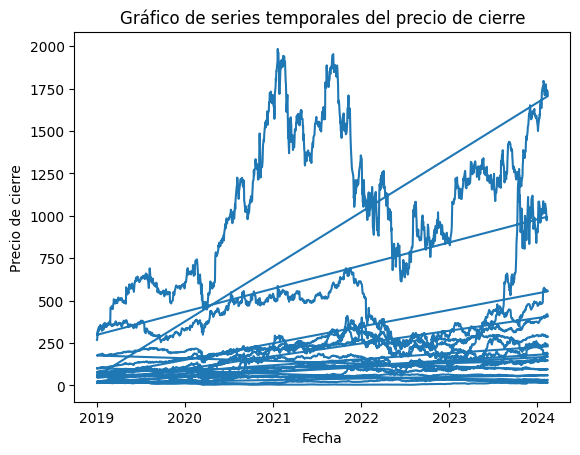

In [19]:
import matplotlib.pyplot as plt

plt.plot(df_data['Date'], df_data['Close'])
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Gráfico de series temporales del precio de cierre')
plt.show()

Se realiza un Histograma del Precio de Cierre. La frecuencia representa el número de observaciones en cada bin. Cada barra del histograma representa un intervalo de precios, es decir bin, y la altura de la barra representa el número de veces que se observaron valores de precio de cierre en ese intervalo:

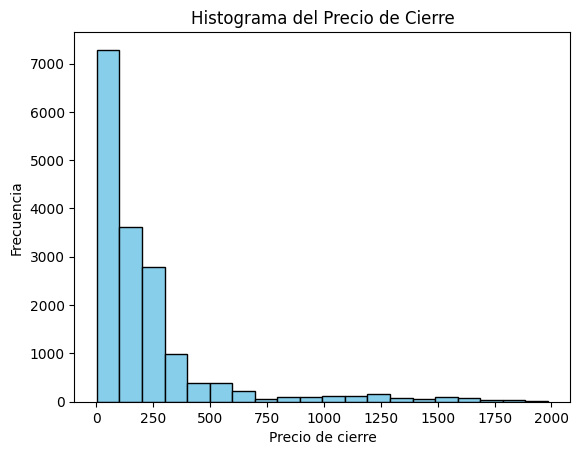

In [20]:
plt.hist(df_data['Close'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.title('Histograma del Precio de Cierre')
plt.show()

Se realiza un gráfico para comparar el volumen de operaciones entre diferentes compañías:

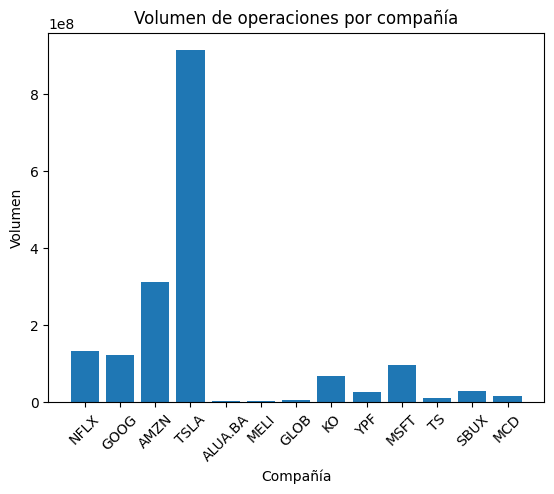

In [21]:
plt.bar(df_data['Company'], df_data['Volume'])
plt.xlabel('Compañía')
plt.ylabel('Volumen')
plt.title('Volumen de operaciones por compañía')
plt.xticks(rotation=45)
plt.show()

Se realiza un gráfico de barras que muestra la diferencia entre el precio de apertura y el precio de cierre de las acciones, por fecha:

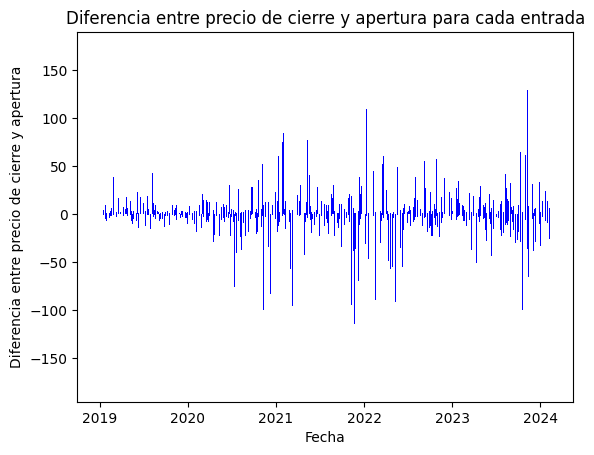

In [22]:
df_data['Diferencia'] = df_data['Close'] - df_data['Open']


plt.bar(df_data['Date'], df_data['Diferencia'], color='blue')

plt.xlabel('Fecha')
plt.ylabel('Diferencia entre precio de cierre y apertura')
plt.title('Diferencia entre precio de cierre y apertura para cada entrada')

plt.show()

Modelos de predicción:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
df_data

,Date,Company,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Diferencia
0,2019-01-02,NFLX,259.28,269.75,256.58,267.66,267.66,11679500,2019,1,2,8.38
1,2019-01-03,NFLX,270.20,275.79,264.43,271.20,271.20,14969600,2019,1,3,1.00
2,2019-01-04,NFLX,281.88,297.80,278.54,297.57,297.57,19330100,2019,1,4,15.69
3,2019-01-07,NFLX,302.10,316.80,301.65,315.34,315.34,18620100,2019,1,7,13.24
4,2019-01-08,NFLX,319.98,320.59,308.01,320.27,320.27,15359200,2019,1,8,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...
16696,2024-02-07,MCD,285.05,290.53,284.11,287.33,287.33,3954700,2024,2,7,2.28
16697,2024-02-08,MCD,286.20,293.15,284.20,291.93,291.93,4605000,2024,2,8,5.73
16698,2024-02-09,MCD,292.15,292.51,288.92,289.47,289.47,3322100,2024,2,9,-2.68
16699,2024-02-12,MCD,289.00,291.19,288.76,289.44,289.44,2392300,2024,2,12,0.44


Este código entrena un modelo de regresión lineal para predecir la diferencia entre el precio de apertura y cierre (Diferencia) utilizando las características del DataFrame.

In [25]:
X = df_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]  # características
y = df_data['Diferencia']  # variable objetivo


In [26]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 1.3353202145488214e-24


# Deep neural network

In [190]:
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
from keras import backend as K

In [191]:
def filter_by_company(df, company_name):
    filtered_df = df[df['Company'] == company_name]
    return filtered_df

### Data

In [192]:
#Get NFLX data
data = filter_by_company(df_data, 'MELI')

,Date,Company,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Diferencia
7680,2024-02-07,MELI,1718.45,1734.92,1704.37,1713.87,1713.87,442800,2024,2,7,-4.58
7681,2024-02-08,MELI,1729.33,1743.78,1712.65,1732.83,1732.83,297600,2024,2,8,3.50
7682,2024-02-09,MELI,1757.51,1775.01,1740.10,1742.26,1742.26,379800,2024,2,9,-15.25
7683,2024-02-12,MELI,1740.18,1767.00,1727.83,1733.23,1733.23,242100,2024,2,12,-6.95
7684,2024-02-13,MELI,1682.22,1729.88,1669.01,1706.24,1706.24,325100,2024,2,13,24.02


In [193]:
def getUntilDate(date):
  # Create a datetime object for the cutoff date
  cutoff_date = pd.Timestamp(date)
  # Slice the DataFrame based on the date
  cut_data = data.loc[data["Date"] <= cutoff_date]
  return cut_data



,Date,Company,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Diferencia
7400,2022-12-23,MELI,864.30,879.73,853.08,878.32,878.32,288100,2022,12,23,14.02
7401,2022-12-27,MELI,872.99,874.38,848.13,854.30,854.30,294000,2022,12,27,-18.69
7402,2022-12-28,MELI,856.44,867.99,838.25,839.57,839.57,475300,2022,12,28,-16.87
7403,2022-12-29,MELI,849.47,874.08,838.05,866.28,866.28,443900,2022,12,29,16.81
7404,2022-12-30,MELI,846.81,851.06,830.01,846.24,846.24,365600,2022,12,30,-0.57


In [194]:
def getFromDate(date):
  # Create a datetime object for the cutoff date
  cutoff_date = pd.Timestamp(date)
  # Slice the DataFrame based on the date
  actual_data = data.loc[data["Date"] >= cutoff_date]
  return actual_data



,Date,Company,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Diferencia
7680,2024-02-07,MELI,1718.45,1734.92,1704.37,1713.87,1713.87,442800,2024,2,7,-4.58
7681,2024-02-08,MELI,1729.33,1743.78,1712.65,1732.83,1732.83,297600,2024,2,8,3.50
7682,2024-02-09,MELI,1757.51,1775.01,1740.10,1742.26,1742.26,379800,2024,2,9,-15.25
7683,2024-02-12,MELI,1740.18,1767.00,1727.83,1733.23,1733.23,242100,2024,2,12,-6.95
7684,2024-02-13,MELI,1682.22,1729.88,1669.01,1706.24,1706.24,325100,2024,2,13,24.02


In [195]:
def scaleData(data, scaler):
  scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))
  return scaled_data

# transforma a valores entre -1 y 1

[[8.41356836e-04]
 [0.00000000e+00]
 [1.11035402e-02]
 ...
 [8.56566435e-01]
 [8.51216116e-01]
 [8.35224411e-01]]


In [196]:
def batchData(batch_size, data):
  # crea batches de batch_size dias y usa el dia 61 como y(labeled)
  X_train, y_train = [],[]

  for x in range(batch_size, len(data)):
    X_train.append(data[x-batch_size:x,0])
    y_train.append(data[x,0])

  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1) )
  print("X:", X_train[:1][0][:2], "\n Y:", y_train[:1])
  return X_train, y_train, batch_size



X: [[0.00084136]
 [0.        ]] 
 Y: [0.03747593]


(1258, 30, 1)

### Model

In [197]:
class MyLSTMModel:
    def __init__(self, input_shape):
        self.model = self.create_model(input_shape)

    def create_model(self, input_shape):
        model = Sequential([
            LSTM(units=50, return_sequences=True, input_shape=input_shape),
            Dropout(0.2),
            LSTM(units=50, return_sequences=True),
            Dropout(0.2),
            LSTM(units=50),
            Dropout(0.2),
            Dense(units=1)
        ])
        model.compile(optimizer="adam", loss="mean_squared_error")
        return model

    def fit_model(self, X_train, y_train, epochs=25, batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    def predict(self, X):
        return self.model.predict(X)



Epoch 1/25
40/40 [==============================] - 11s 40ms/step - loss: 0.0284
Epoch 2/25
40/40 [==============================] - 2s 40ms/step - loss: 0.0067
Epoch 3/25
40/40 [==============================] - 2s 54ms/step - loss: 0.0058
Epoch 4/25
40/40 [==============================] - 2s 49ms/step - loss: 0.0063
Epoch 5/25
40/40 [==============================] - 2s 39ms/step - loss: 0.0055
Epoch 6/25
40/40 [==============================] - 2s 39ms/step - loss: 0.0056
Epoch 7/25
40/40 [==============================] - 2s 39ms/step - loss: 0.0052
Epoch 8/25
40/40 [==============================] - 2s 39ms/step - loss: 0.0046
Epoch 9/25
40/40 [==============================] - 2s 39ms/step - loss: 0.0047
Epoch 10/25
40/40 [==============================] - 2s 46ms/step - loss: 0.0043
Epoch 11/25
40/40 [==============================] - 2s 59ms/step - loss: 0.0047
Epoch 12/25
40/40 [==============================] - 2s 38ms/step - loss: 0.0048
Epoch 13/25
40/40 [=================

In [198]:
def getTestData(actual_data):
  test_data = actual_data
  actual_prices = test_data['Close'].values
  total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
  model_inputs = total_dataset[len(total_dataset)-len(test_data)- prediction_days:].values
  # (-1,1) filas desconocidas, 1 col
  model_inputs = model_inputs.reshape(-1,1)

  # transformamos a valores entre 0,1
  model_inputs = scaler.fit_transform(model_inputs)
  x_test = []
  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0],)

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
  return x_test, actual_prices



(280, 30, 1)

In [199]:
def graphPredictActual(stock_name,actual_prices, prediction_prices ):
  plt.title(f"{stock_name} price prediction")
  plt.plot(actual_prices, color="black", label="Actual prices")
  plt.plot(prediction_prices, color="green", label="Prediction prices")
  plt.xlabel("time")
  plt.ylabel('price')
  plt.legend(loc="upper left")
  plt.show()

9/9 [==============================] - 0s 23ms/step


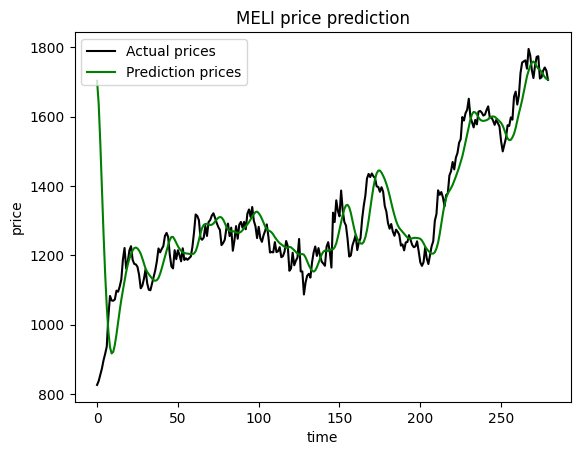

In [204]:
def predictGraph(x_test, stock):
  ### test data
  prediction_prices = my_lstm_model.predict(x_test)
  # transformamos a valores normales en este caso los precios
  prediction_prices = scaler.inverse_transform(prediction_prices)
  graphPredictActual(stock, actual_prices, prediction_prices)
  return prediction_prices

# Predict

X: [[0.02195759]
 [0.02032459]] 
 Y: [0.02090242]
Epoch 1/25
40/40 [==============================] - 13s 72ms/step - loss: 0.0387
Epoch 2/25
40/40 [==============================] - 3s 64ms/step - loss: 0.0063
Epoch 3/25
40/40 [==============================] - 2s 38ms/step - loss: 0.0053
Epoch 4/25
40/40 [==============================] - 2s 50ms/step - loss: 0.0053
Epoch 5/25
40/40 [==============================] - 2s 53ms/step - loss: 0.0050
Epoch 6/25
40/40 [==============================] - 1s 37ms/step - loss: 0.0046
Epoch 7/25
40/40 [==============================] - 2s 37ms/step - loss: 0.0044
Epoch 8/25
40/40 [==============================] - 2s 38ms/step - loss: 0.0038
Epoch 9/25
40/40 [==============================] - 2s 38ms/step - loss: 0.0040
Epoch 10/25
40/40 [==============================] - 1s 37ms/step - loss: 0.0038
Epoch 11/25
40/40 [==============================] - 1s 37ms/step - loss: 0.0041
Epoch 12/25
40/40 [==============================] - 2s 57ms/step -

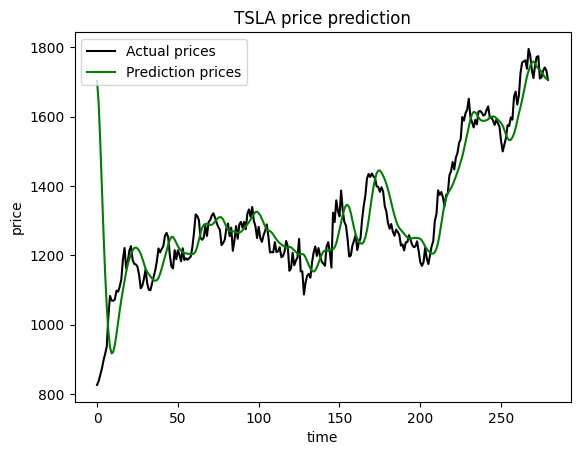

In [205]:
def predict(stock):
  data = filter_by_company(df_data, stock)
  cut_data = getUntilDate('2023-01-01')
  actual_data = getFromDate('2023-01-01')
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaleData(data, scaler)
  X_train, y_train, prediction_days = batchData(30, scaled_data)
  input_shape = (X_train.shape[1], 1)
  my_lstm_model = MyLSTMModel(input_shape)
  my_lstm_model.fit_model(X_train, y_train, epochs=25, batch_size=32)
  x_test, actual_prices = getTestData(actual_data)
  prediction_prices = predictGraph(x_test, stock)





predict("TSLA")
